In [8]:
import numpy as np
import pandas as pd
import matplotlib
from collections import defaultdict
from matplotlib import pyplot as plt
from urllib import urlencode

import urllib2
import time
import json
import operator
import urllib2 

# Университеты

In [50]:
def update_uni_name(user):
    if 'university_name' not in user:
        return user
    if len(user['university_name']) > 20:
        user['university_name'] = user['university_name'][:20] + u"…"
    return user

def universities(users_dataset, save_as, drop_empty):
    with open(users_dataset) as data_file:    
        users = json.load(data_file)

    users = map(update_uni_name, users)
        
    df = pd.DataFrame(users)
    df = df.groupby('university_name').size()

    df.sort(['university_name'], ascending=False)
    if drop_empty:
        df = df.drop(df.index[[0]])
    plt.figure(figsize=(15, 20))
    plt.xkcd()

    matplotlib.rc('xtick', labelsize=0)
    matplotlib.rc('ytick', labelsize=20)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off') # labels along the bottom edge are off

    p = df[:15].plot(kind='barh', color='#555577')
    p.set_xlabel("")
    p.set_ylabel("")
    p.get_figure().set_size_inches(8, 8)
    p.get_figure().tight_layout()
    p.get_figure().savefig(save_as, dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


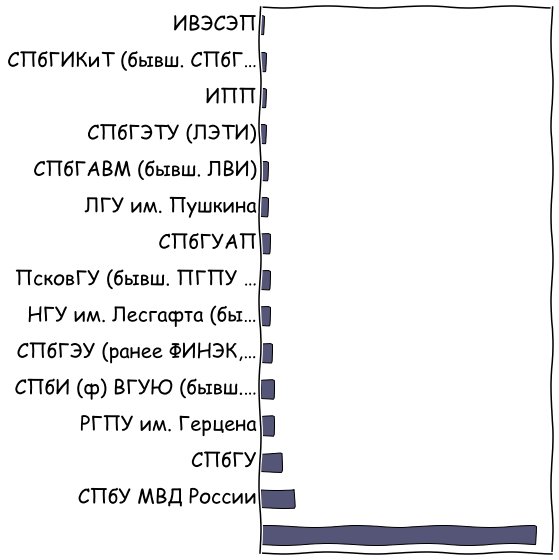

In [51]:
universities('datasets/police/users.json', 'images/universities_police_all.png', False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


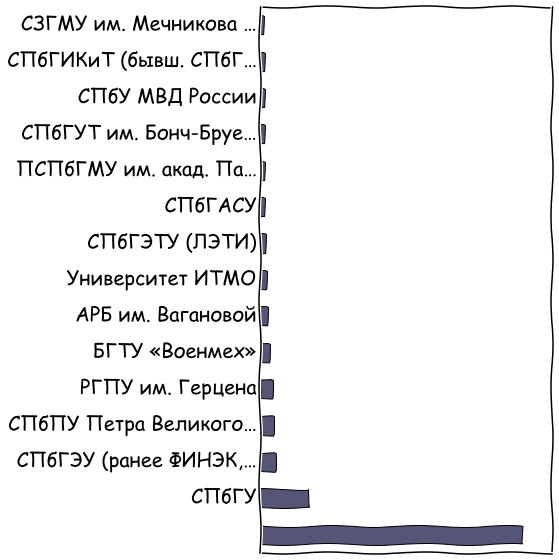

In [52]:
universities('datasets/people/users.json', 'images/universities_people_all.png', False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


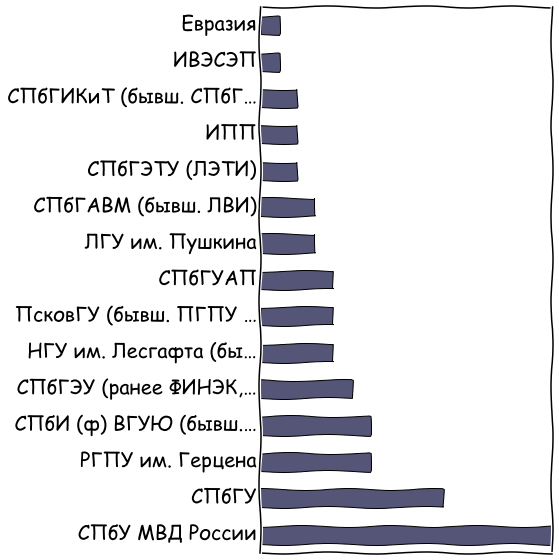

In [53]:
universities('datasets/police/users.json', 'images/universities_police_non_empty.png', True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


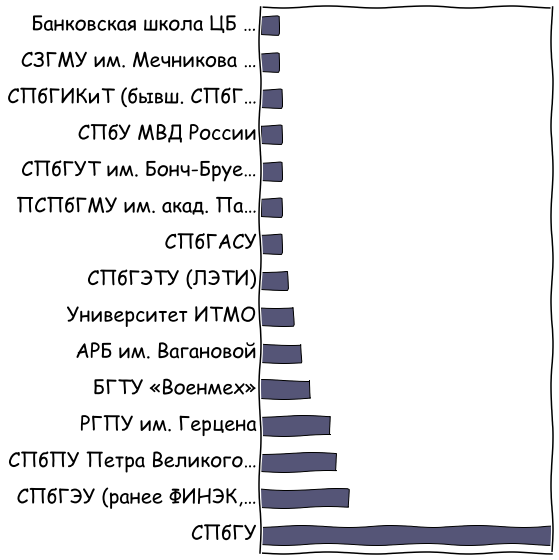

In [54]:
universities('datasets/people/users.json', 'images/universities_people_non_empty.png', True)

# Пол

In [41]:
def update_sex(user):
    user['sex_name'] = {
        0: 'N/A',
        1: u'Ж',
        2: u'М',
    }[user['sex']]
    return user
    
def sex_analysis(dataset_file, save_as):
    with open(dataset_file) as data_file:    
        users = json.load(data_file)

    users = map(update_sex, users)
    users = filter(lambda x: x['sex'] != 0, users)

    df = pd.DataFrame(users)
    df = df.groupby('sex_name').size()

    p = df.plot(kind='bar', color='#555577')

    plt.xkcd()

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off')         # labels along the bottom edge are off

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',
        right='off')         # labels along the bottom edge are off

    matplotlib.rc('xtick', labelsize=24)
    matplotlib.rc('ytick', labelsize=0)

    plt.xticks(rotation=0)

    p.set_xlabel("")
    p.get_figure().set_size_inches(4, 6)
    p.get_figure().tight_layout()
    p.get_figure().savefig(save_as, dpi=100)

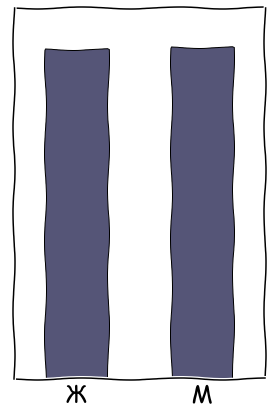

In [42]:
sex_analysis('datasets/people/users.json', 'images/sex_people.png')

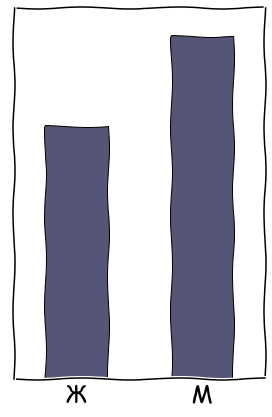

In [43]:
sex_analysis('datasets/police/users.json', 'images/sex_police.png')

# Популярные группы

In [86]:
def process_group_info(i):
    return {"name": update_group_name(i.get('name', '')),
            "count": i.get('people_count', 0)}

def update_group_name(name):
    if len(name) > 25:
        return name[:25] + u"…"
    return name

def popular_groups(dataset_file, save_as):
    with open(dataset_file) as data_file:    
        groups_info = json.load(data_file)
    
    df = pd.DataFrame(map(process_group_info, groups_info[:15])).set_index('name')

    matplotlib.rc('xtick', labelsize=0)
    matplotlib.rc('ytick', labelsize=20)

    p = df.plot(kind='barh', legend=False, color='#555577')

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off')         # labels along the bottom edge are off

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',
        right='off')         # labels along the bottom edge are off

    p.set_ylabel("")
    p.set_xlabel("")

    p.get_figure().set_size_inches(8, 8)
    p.get_figure().tight_layout()
    p.get_figure().savefig(save_as, dpi=100)

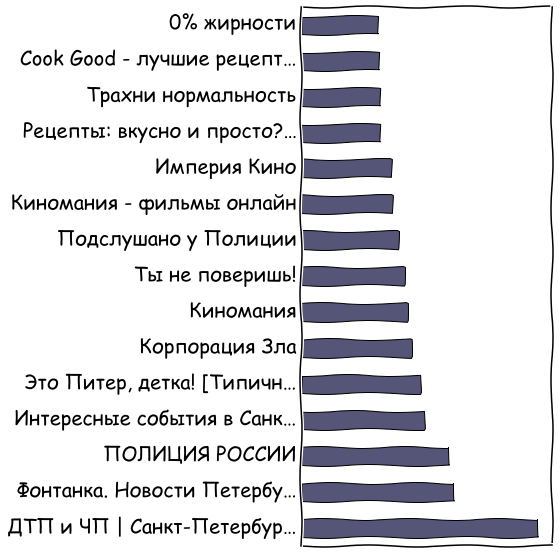

In [87]:
popular_groups('datasets/police/groups.json', 'images/popular_groups_police.png')

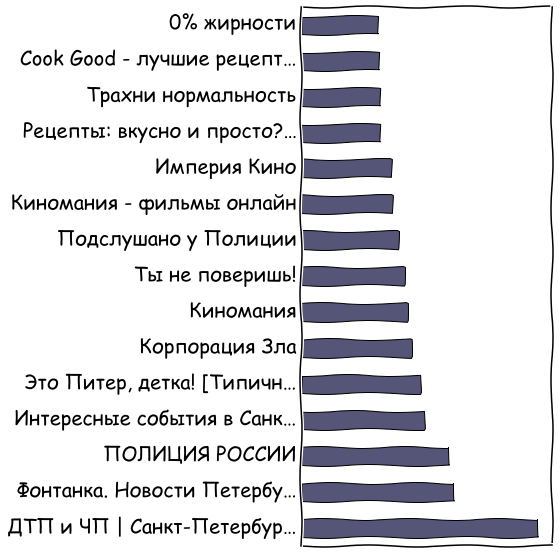

In [89]:
popular_groups('datasets/people/groups.json', 'images/popular_groups_people.png')

# Образование в целом

In [60]:
def education(users_dataset):
    with open(users_dataset) as data_file:    
        users = json.load(data_file)

    def process_user(u):
        u['has_schools'] = isinstance(u.get('schools', []), list) and len(u.get('schools', [])) != 0
        u['has_universities'] = isinstance(u.get('universities', []), list) and len(u.get('universities', [])) != 0
        return u;

    users = map(process_user, users)

    df = pd.DataFrame(users)
    df = df.groupby(['has_schools', 'has_universities']).size()
    return df

In [61]:
education('datasets/people/users.json')

has_schools  has_universities
False        False               1701
             True                 146
True         False                283
             True                 373
dtype: int64

In [62]:
education('datasets/police/users.json')

has_schools  has_universities
False        False               1418
             True                  26
True         False                 71
             True                  95
dtype: int64

# СМИ

In [105]:
media_groups = [
    "kpru",
    "kp.radio",
    "kppiter",
    "kfm",
    "kommersant_ru",
    "mk_ru",
    "izvestia",
    "rbc",
    "lifenews",
    "aif_ru",
    "fontanka",
    "fmvesti",
    "echomsk",
    "tvrain",
    "rgru",
    "gazeta",
    "vesti_spb",
    "rentvchannel",
]

def get_media_groups(groups_ids_dataset, save_as):
    group_ids = ",".join(media_groups)
    params = {"group_ids": group_ids}
    params = urlencode(params)
    url = "https://api.vk.com/method/groups.getById?" + params
    data = json.load(urllib2.urlopen(url))

    if data.get('response', ''):
        groups_info = data['response']
        ids = map(lambda x: str(x['gid']), groups_info)

        with open(groups_ids_dataset) as data_file:    
            groups = json.load(data_file)

        unwanted = set(groups) - set(ids)
        for unwanted_key in unwanted: 
            del groups[unwanted_key]

        f = open(save_as,'w')
        f.write(json.dumps(groups))
        f.close()

In [106]:
get_media_groups('datasets/police/groups_ids.json', 'datasets/police/media_ids.json')

In [107]:
get_media_groups('datasets/people/groups_ids.json', 'datasets/people/media_ids.json')

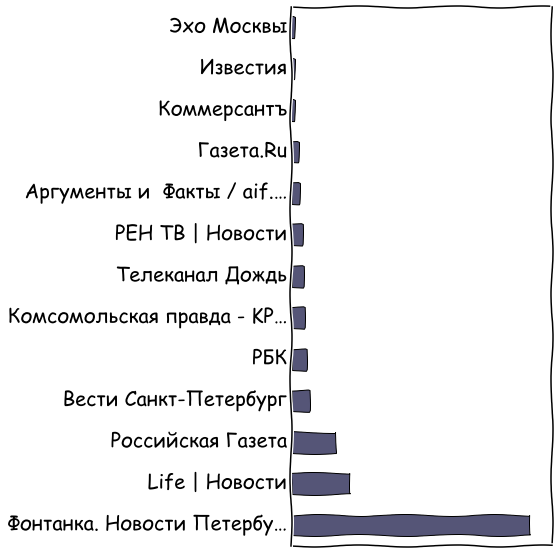

In [108]:
popular_groups('datasets/police/media.json', 'images/popular_media_police.png')

In [ ]:
popular_groups('datasets/people/media.json', 'images/popular_media_police.png')